In [1]:
import os
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_context('paper', font_scale=1.2)
import pandas as pd
import warnings
import sys
import dabest

warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
DirectoryName = '/Users/seetha/Box Sync/MultiDayData/Data/'
CombinedFolderName = '/Users/seetha/Box Sync/MultiDayData/PlaceCellResultsAll/'
SaveFigureFolder = '/Users/seetha/Box Sync/MultiDayData/MultiDayPaper/Figures/FigurepanelsPDF/CommonPCs/'

In [3]:
from numplacecells import GetData as gd

In [4]:
taskstoplot = ['Task1', 'Task2', 'Task3', 'Task4', 'Task5']
num = gd(FolderName=DirectoryName, CombinedDataFolder=CombinedFolderName, taskstoplot=taskstoplot)

Index(['Task', 'CellNumber', 'PlaceCellNumber', 'NumPlacecells', 'COM',
       'WeightedCOM', 'Precision', 'Precision_rising', 'Width', 'FiringRatio',
       'Firingintensity', 'Reliability', 'animalname'],
      dtype='object')


In [5]:
uncommondf = num.updateddf[~num.updateddf['CommonCells']]

In [6]:
commondf = num.updateddf[num.updateddf['CommonCells']]

## Get reliability of all cells

In [10]:
reldict = {k:[] for k in ['Task', 'animalname', 'CellNumber', 'Reliability']}
for a in num.animals:
    df = commondf[commondf['animalname']==a]
    numcells = df['CellNumber'].unique()
    for c in numcells:
        for t in taskstoplot:
            reldict['Task'].append(t)
            reldict['CellNumber'].append(c)
            reldict['animalname'].append(a)
            reliability = df[(df['Task']==t) & (df['CellNumber']==c)]['Reliability'].to_numpy()            
            if len(reliability):
                reldict['Reliability'].append(reliability[0])
            else:
                reldict['Reliability'].append(np.nan)

In [7]:
reldf = pd.DataFrame.from_dict(reldict)
reldf = reldf.pivot(index=['animalname', 'CellNumber'], columns=['Task'], values=['Reliability'])
# reldf = reldf.reset_index().dropna()

In [8]:
data = reldf['Reliability']
data = data.sort_values(by=['Task1', 'Task2', 'Task5'], ascending=False)
data.head()

Task                      Task1     Task2     Task3     Task4     Task5
animalname CellNumber                                                  
NR34       129         0.946049  0.919521  0.268406  0.337744  0.137906
           514         0.940192  0.631046  0.242543  0.556274       NaN
           252         0.935896  0.919480  0.428074  0.420505  0.251564
CFC17      108         0.935880  0.896841  0.806795  0.769540  0.854709
NR34       625         0.933016  0.926189  0.811507  0.575015  0.330650

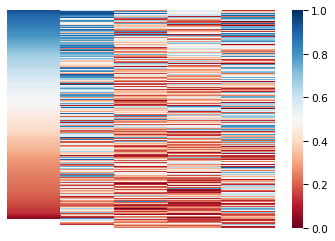

In [9]:
fs, ax = plt.subplots(1)
sns.heatmap(data=data, vmin=0, vmax=1, cmap=sns.color_palette("RdBu", as_cmap=True), ax=ax)
ax.axis('off');
fs.savefig(os.path.join(SaveFigureFolder, 'Reliability_heatmap_allcommonPCs.tiff'), bbox_inches='tight', dpi=300)

In [10]:
data = data.sort_values(by=taskstoplot, ascending=False)
data.head()

Task                      Task1     Task2     Task3     Task4     Task5
animalname CellNumber                                                  
NR34       129         0.946049  0.919521  0.268406  0.337744  0.137906
           514         0.940192  0.631046  0.242543  0.556274       NaN
           252         0.935896  0.919480  0.428074  0.420505  0.251564
CFC17      108         0.935880  0.896841  0.806795  0.769540  0.854709
NR34       625         0.933016  0.926189  0.811507  0.575015  0.330650

33


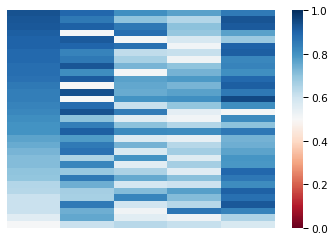

In [11]:
fs, ax = plt.subplots(1)
print(len(data[data>=0.5].dropna()))
sns.heatmap(data=data[data>=0.5].dropna(), vmin=0, vmax=1, cmap=sns.color_palette("RdBu", as_cmap=True), ax=ax)
ax.axis('off')
fs.savefig(os.path.join(SaveFigureFolder, 'Reliability_heatmap_commonhighreliable.tiff'), bbox_inches='tight', dpi=300)

## Get reliability of single place cells

In [51]:
reldict = {k:[] for k in ['Task', 'animalname', 'CellNumber', 'Reliability']}
for a in num.animals:
    df = commondf[commondf['animalname']==a]
    numcells = df['CellNumber'].unique()
    for c in numcells:
        for t in taskstoplot:
            reldict['Task'].append(t)
            reldict['CellNumber'].append(c)
            reldict['animalname'].append(a)
            reliability = df[(df['Task']==t) & (df['CellNumber']==c)]['Reliability'].to_numpy()            
            if len(reliability)==1:
                reldict['Reliability'].append(reliability[0])
            else:
                reldict['Reliability'].append(np.nan)

In [52]:
reldf = pd.DataFrame.from_dict(reldict)
reldf = reldf.pivot(index=['animalname', 'CellNumber'], columns=['Task'], values=['Reliability'])
reldf = reldf.reset_index().dropna()

In [55]:
x = reldf.reset_index().droplevel(level=0, axis=1)
ind = x.index[(x[['Task1', 'Task2']]>=0.5).all(1)]
print(len(ind))
print(len(x))
print(len(ind)/len(x))

Task,,,,Task1,Task2,Task3,Task4,Task5
0,2,CFC16,25,0.176016,0.370542,0.195675,0.074955,0.409595
1,5,CFC16,42,0.231165,0.317507,0.119218,0.104011,0.278749
2,6,CFC16,44,0.225456,0.770215,0.433987,0.406075,0.628873
3,7,CFC16,45,0.440464,0.623213,0.662165,0.411084,0.690923
4,9,CFC16,57,0.143871,0.332310,0.122705,0.319964,0.159601
...,...,...,...,...,...,...,...,...
272,648,NR34,702,0.549192,0.674105,0.196541,0.370305,0.136727
273,650,NR34,715,0.283874,0.583151,0.310785,0.220177,0.206526
274,652,NR34,782,0.321627,0.749468,0.239271,0.484510,0.048794
275,653,NR34,864,0.198439,0.304104,0.143229,0.129277,0.131074


In [16]:
data = reldf['Reliability']
s = data.sum(axis=1)
data = data.sort_values(by=['Task1', 'Task2', 'Task5'], ascending=False)
data.head()

Task,Task1,Task2,Task3,Task4,Task5
174,0.935880,0.896841,0.806795,0.769540,0.854709
644,0.933016,0.926189,0.811507,0.575015,0.330650
281,0.924313,0.928670,0.590394,0.525205,0.401704
220,0.923041,0.908394,0.856305,0.706509,0.920562
191,0.910215,0.506771,0.881529,0.693476,0.770244


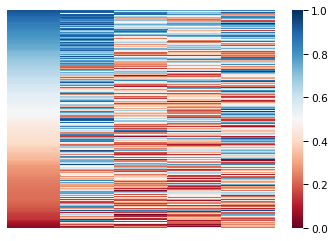

In [17]:
fs, ax = plt.subplots(1)
sns.heatmap(data=data, vmin=0, vmax=1, cmap=sns.color_palette("RdBu", as_cmap=True), ax=ax)
ax.axis('off')
fs.savefig(os.path.join(SaveFigureFolder, 'Reliability_heatmap_singlePFs.tiff'), bbox_inches='tight', dpi=300)

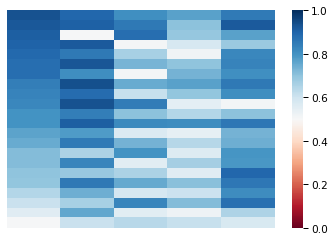

In [18]:
fs, ax = plt.subplots(1)
sns.heatmap(data=data[data>=0.5].dropna(), vmin=0, vmax=1, cmap=sns.color_palette("RdBu", as_cmap=True), ax=ax)
ax.axis('off')
fs.savefig(os.path.join(SaveFigureFolder, 'Reliability_heatmap_commonhighreliable.tiff'), bbox_inches='tight', dpi=300)

## Reliability and out of field firing ratio correlation

In [6]:
a = commondf[commondf['Task'].isin(['taskstoplot'])][['Reliability', 'FiringRatio']]
a = a.dropna()

Corr=-0.369, P=0.000


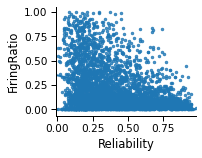

In [7]:
fs, ax = plt.subplots(1)
sns.regplot(x='Reliability', y='FiringRatio', data=a, marker='o',
                scatter_kws={'s':6}, ax=ax)
c, p = scipy.stats.pearsonr(a['Reliability'], a['FiringRatio'])
print('Corr=%0.3f, P=%0.3f' %(c, p))
sns.despine(ax=ax)
fs.set_size_inches((2.5, 2))
fs.savefig(os.path.join(SaveFigureFolder, 'Reliability_vs_firingratio.pdf'), bbox_inches='tight')

In [21]:
c1 = []
for t in taskstoplot:
    a = commondf[commondf['Task']==t][['Reliability', 'FiringRatio']]
    a = a.dropna()
    c, p = scipy.stats.pearsonr(a['Reliability'], a['FiringRatio'])
    c1.append(c)
    print('Corr=%0.3f, P=%0.3f' %(c, p))

Corr=-0.326, P=0.000
Corr=-0.326, P=0.000
Corr=-0.340, P=0.000
Corr=-0.338, P=0.000
Corr=-0.416, P=0.000


In [22]:
np.mean(c1)

-0.34940909408918275

## Reliability versus remapping in common place cells

### COM with Task1

In [8]:
reldict = {k:[] for k in ['Task', 'animalname', 'CellNumber', 'Reliability']}
for a in num.animals:
    df = commondf[commondf['animalname']==a]
    numcells = df['CellNumber'].unique()
    for c in numcells:
        for t in taskstoplot:
            reldict['Task'].append(t)
            reldict['CellNumber'].append(c)
            reldict['animalname'].append(a)
            reliability = df[(df['Task']==t) & (df['CellNumber']==c)]['Reliability'].to_numpy()            
            if len(reliability)==1:
                reldict['Reliability'].append(reliability[0])
            else:
                reldict['Reliability'].append(np.nan)

In [9]:
comdict = {k:[] for k in ['Task', 'animalname', 'CellNumber', 'WeightedCOM']}
for a in num.animals:
    df = commondf[commondf['animalname']==a]
    numcells = df['CellNumber'].unique()
    for c in numcells:
        for t in taskstoplot:
            comdict['Task'].append(t)
            comdict['CellNumber'].append(c)
            comdict['animalname'].append(a)
            com = df[(df['Task']==t) & (df['CellNumber']==c)]['WeightedCOM'].to_numpy()            
            if len(com)==1:
                comdict['WeightedCOM'].append(com[0])
            else:
                comdict['WeightedCOM'].append(np.nan)

In [10]:
reldf = pd.DataFrame.from_dict(reldict)
reldf = reldf.pivot(index=['animalname', 'CellNumber'], columns=['Task'], values=['Reliability'])
reldf = reldf.reset_index().dropna()

In [11]:
comdf = pd.DataFrame.from_dict(comdict)
comdf = comdf.pivot(index=['animalname', 'CellNumber'], columns=['Task'], values=['WeightedCOM'])
comdf = comdf.reset_index().dropna()

In [12]:
merged_df = pd.merge(reldf, comdf, left_index=True, right_index=True, how='outer', suffixes=('', '_y'))
merged_df.drop(columns=list(merged_df.filter(regex='_y')), axis=1, inplace=True)
for t in taskstoplot[1:]:
    merged_df['Diff_%s' %t] = (merged_df['WeightedCOM']['Task1']-merged_df['WeightedCOM'][t]).abs()
merged_df.head()

animalname CellNumber Reliability                                \
Task                             Task1     Task2     Task3     Task4   
2         CFC16         25    0.176016  0.370542  0.195675  0.074955   
5         CFC16         42    0.231165  0.317507  0.119218  0.104011   
6         CFC16         44    0.225456  0.770215  0.433987  0.406075   
7         CFC16         45    0.440464  0.623213  0.662165  0.411084   
9         CFC16         57    0.143871  0.332310  0.122705  0.319964   

               WeightedCOM                                              \
Task     Task5       Task1      Task2      Task3      Task4      Task5   
2     0.409595    7.807550   6.196291   9.224117  12.933575   8.106968   
5     0.278749   35.367053  36.650177  31.770851  32.806902  29.336318   
6     0.628873   37.960576  38.157052  37.499877  34.649757  38.057436   
7     0.690923   33.232810  33.815395  35.717712  32.929517  33.444938   
9     0.159601   29.264342  36.592154   3.456125  32.144857  36.045110   

     Diff_Task2 Diff_Task3 Diff_Task4 Diff_Task5  
Task                                              
2      1.611259   1.416567   5.126025   0.299417  
5      1.283124   3.596202   2.560151   6.030735  
6      0.196476   0.460700   3.310819   0.096859  
7      0.582586   2.484902   0.303293   0.212128  
9      7.327813  25.808217   2.880515   6.780768

In [17]:
merged_df['Diff_Task2'].mean()*5

10.719419236326395

In [127]:
remap_less = merged_df[(merged_df[['Diff_Task2', 'Diff_Task3', 'Diff_Task4', 'Diff_Task5']]<=2).all(1)]
print(len(remap_less))
remap_less = remap_less[['animalname', 'CellNumber', 'Reliability']]
remap_less = remap_less.set_index(['animalname','CellNumber'])
remap_less.columns = remap_less.columns.droplevel(0)
remap_less = remap_less.reset_index()
melteddf_less = remap_less.melt(id_vars=['CellNumber', 'animalname'], var_name='Task', value_name='Reliability')
melteddf_less['Remap'] = 'Less'
melteddf_less.head()

96


,CellNumber,animalname,Task,Reliability,Remap
0,303,CFC16,Task1,0.235966,Less
1,328,CFC16,Task1,0.648066,Less
2,382,CFC16,Task1,0.397894,Less
3,572,CFC16,Task1,0.440387,Less
4,737,CFC16,Task1,0.440375,Less


In [128]:
remap_more = merged_df[(merged_df[['Diff_Task2', 'Diff_Task3', 'Diff_Task4', 'Diff_Task5']]>2).any(1)]
print(len(remap_more))
remap_more = remap_more[['animalname', 'CellNumber', 'Reliability']]
remap_more = remap_more.set_index(['animalname','CellNumber'])
remap_more.columns = remap_more.columns.droplevel(0)
remap_more = remap_more.reset_index()
melteddf_more = remap_more.melt(id_vars=['CellNumber', 'animalname'], var_name='Task', value_name='Reliability')
melteddf_more['Remap'] = 'More'
melteddf_more.head()

181


,CellNumber,animalname,Task,Reliability,Remap
0,25,CFC16,Task1,0.176016,More
1,42,CFC16,Task1,0.231165,More
2,44,CFC16,Task1,0.225456,More
3,45,CFC16,Task1,0.440464,More
4,57,CFC16,Task1,0.143871,More


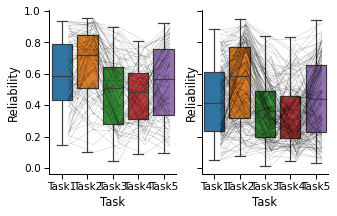

In [159]:
fs, ax = plt.subplots(1, 2, sharex='all', sharey='all')
for n, df in enumerate([melteddf_less, melteddf_more]):
    sns.boxplot(data=df, x='Task', y='Reliability',
                showfliers=False, ax=ax[n])

for n, data in enumerate([remap_less, remap_more]):
    for i, r in data.iterrows():
        ax[n].plot(np.arange(len(taskstoplot))+0.25, r[taskstoplot], 'k-', linewidth=0.2, alpha=0.5)
        
for a in ax:
    sns.despine(ax=a)

fs.set_size_inches((5, 3))
fs.savefig(os.path.join(SaveFigureFolder, 'Reliability_withamountofremapping.pdf'), bbox_inches='tight')

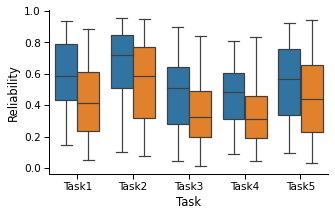

In [160]:
fs, ax = plt.subplots(1)
df = pd.concat((melteddf_more, melteddf_less))
sns.boxplot(data=df, x='Task', y='Reliability', hue='Remap', hue_order=['Less', 'More'], showfliers=False, ax=ax)
sns.despine(ax=ax)
ax.legend_.remove()
fs.set_size_inches((5, 3))
fs.savefig(os.path.join(SaveFigureFolder, 'Reliability_betweenremappingamounts.pdf'), bbox_inches='tight')

In [177]:
from scipy import stats
import statsmodels.stats.multicomp as mc

comp1 = mc.MultiComparison(melteddf_more['Reliability'], melteddf_more['Task'])
tbl, a1, a2 = comp1.allpairtest(stats.ks_2samp, method= "bonf")
tbl

group1,group2,stat,pval,pval_corr,reject
Task1,Task2,0.2265,0.0002,0.0018,True
Task1,Task3,0.2099,0.0007,0.0066,True
Task1,Task4,0.2265,0.0002,0.0018,True
Task1,Task5,0.0994,0.3331,1.0,False
Task2,Task3,0.3978,0.0,0.0,True
Task2,Task4,0.3702,0.0,0.0,True
Task2,Task5,0.1768,0.0069,0.0689,False
Task3,Task4,0.0884,0.4803,1.0,False
Task3,Task5,0.2431,0.0,0.0004,True
Task4,Task5,0.232,0.0001,0.0011,True


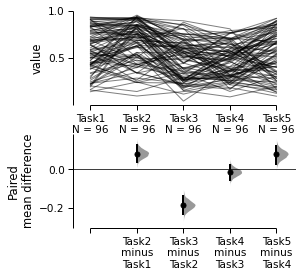

In [168]:
fs, ax = plt.subplots(1)
remap_less['Index'] = remap_less.index
sequential_repeated_measures = dabest.load(remap_less, idx=('Task1', 'Task2', 'Task3', 'Task4', 'Task5'),
                                             id_col="Index", paired='sequential')
sequential_repeated_measures.mean_diff.plot(ax=ax, float_contrast=False, es_marker_size=5);
fs.set_size_inches((4, 4))
fs.savefig(os.path.join(SaveFigureFolder, 'Reliability_withlessremapping_dabest.pdf'), bbox_inches='tight')

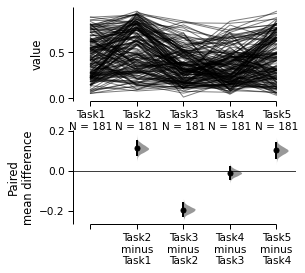

In [169]:
fs, ax = plt.subplots(1)
remap_more['Index'] = remap_more.index
sequential_repeated_measures = dabest.load(remap_more, idx=('Task1', 'Task2', 'Task3', 'Task4', 'Task5'),
                                             id_col="Index", paired='sequential')
sequential_repeated_measures.mean_diff.plot(ax=ax, float_contrast=False, es_marker_size=5);
fs.set_size_inches((4, 4))
fs.savefig(os.path.join(SaveFigureFolder, 'Reliability_withmoreremapping_dabest.pdf'), bbox_inches='tight')

In [189]:
df = pd.concat((melteddf_more, melteddf_less))

for t in taskstoplot:
    data1 = df[(df['Task']==t) & (df['Remap']=='Less')]['Reliability']
    data2 = df[(df['Task']==t) & (df['Remap']=='More')]['Reliability']
    a, p = stats.ks_2samp(data1, data2)
    print('Task: %s, tstat=%0.3f, p=%0.3f' %(t, a, p))

Task: Task1, tstat=0.290, p=0.000
Task: Task2, tstat=0.235, p=0.002
Task: Task3, tstat=0.325, p=0.000
Task: Task4, tstat=0.312, p=0.000
Task: Task5, tstat=0.202, p=0.010


## Reliability numbers common versus uncommon

In [34]:
reldict = {k:[] for k in ['Task', 'animalname', 'CellNumber', 'Reliability']}
for a in num.animals:
    df = commondf[commondf['animalname']==a]
    numcells = df['CellNumber'].unique()
    for c in numcells:
        for t in taskstoplot:
            reldict['Task'].append(t)
            reldict['CellNumber'].append(c)
            reldict['animalname'].append(a)
            reliability = df[(df['Task']==t) & (df['CellNumber']==c)]['Reliability'].to_numpy()            
            if len(reliability):
                reldict['Reliability'].append(reliability[0])
            else:
                reldict['Reliability'].append(np.nan)

In [35]:
reldf = pd.DataFrame.from_dict(reldict)
reldf = reldf.pivot(index=['animalname', 'CellNumber'], columns=['Task'], values=['Reliability'])
# reldf = reldf.reset_index().dropna()

In [36]:
data = reldf['Reliability']
data = data.sort_values(by=['Task1', 'Task2', 'Task5'], ascending=False)
data.head()

Task                      Task1     Task2     Task3     Task4     Task5
animalname CellNumber                                                  
NR34       129         0.946049  0.919521  0.268406  0.337744  0.137906
           514         0.940192  0.631046  0.242543  0.556274       NaN
           252         0.935896  0.919480  0.428074  0.420505  0.251564
CFC17      108         0.935880  0.896841  0.806795  0.769540  0.854709
NR34       625         0.933016  0.926189  0.811507  0.575015  0.330650

In [38]:
df = num.updateddf

In [39]:
len(df[(df['Task']=='Task3') & (df['Reliability']>=0.5) & (df['CommonCells']==True)])

186

In [40]:
len(data[data>=0.5].dropna())

33

In [41]:
len(df[(df['Task']=='Task3') & (df['Reliability']>=0.5)])

269

In [42]:
33/269

0.12267657992565056